In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.
print(X.shape)

# rescale the data, use the traditional train/test split
import math
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25)
print(X_train.shape, X_test.shape)

Automatically created module for IPython interactive environment
(70000, 784)
(17500, 784) (52500, 784)


In [9]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)

Iteration 1, loss = 0.53128879
Iteration 2, loss = 0.25181911
Iteration 3, loss = 0.19231672
Iteration 4, loss = 0.15753583
Iteration 5, loss = 0.13115390
Iteration 6, loss = 0.11128497
Iteration 7, loss = 0.09497591
Iteration 8, loss = 0.07865407
Iteration 9, loss = 0.06925081
Iteration 10, loss = 0.06051683


C:\Users\sales2\Anaconda3\envs\Plain\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.1, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [10]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.985086
Test set score: 0.954076


In [11]:
print("Number of layers =" , mlp.n_layers_)
print("layerweigts =" , len(mlp.coefs_))
print("Number of outputs =" , mlp.n_outputs_)
print("classes =" , mlp.classes_)

print("First layer wieights shape:", mlp.coefs_ [0].shape)
print("First layer wieights:", mlp.coefs_ [0])
print("First layer wieights min and max:", mlp.coefs_ [0].min(), mlp.coefs_[0].max())

Number of layers = 3
layerweigts = 2
Number of outputs = 10
classes = ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
First layer wieights shape: (784, 50)
First layer wieights: [[-0.01407     0.0373589  -0.08476214 ... -0.03499542 -0.03598546
  -0.06273349]
 [-0.08149761  0.0303239  -0.04889722 ...  0.01249332 -0.08429483
   0.01986345]
 [-0.02939462  0.00458805  0.06544153 ...  0.03611507  0.01012579
  -0.0826525 ]
 ...
 [ 0.02851059 -0.07649361 -0.01942138 ... -0.06699164 -0.02822057
  -0.05103327]
 [-0.05611675  0.08435429 -0.07574683 ... -0.03979564 -0.06704103
   0.08227496]
 [ 0.04904501  0.04572051 -0.0187966  ...  0.04121715 -0.00405949
  -0.05417167]]
First layer wieights min and max: -0.44243386112275296 0.5969326889670926


In [22]:
print("Second layer wieights shape:", mlp.coefs_ [1].shape, mlp.coefs_ [1].T.shape)
print("Second layer wieights:", mlp.coefs_ [1])
print("Second layer wieights min and max:", mlp.coefs_ [1].min(), mlp.coefs_[1].max())

Second layer wieights shape: (50, 10) (10, 50)
Second layer wieights: [[-8.41620592e-01  5.11357853e-01 -2.45085950e-01  5.14068373e-01
   2.62603012e-01  2.84401350e-01 -9.90734230e-01 -8.82184177e-03
   2.61450839e-01  2.81102240e-01]
 [-1.81086561e-01  6.95029388e-01 -6.38424183e-01 -1.02955549e+00
   7.30521581e-01 -1.20911534e-01 -4.49118676e-03 -2.92349778e-01
   3.47749990e-02  3.54130439e-01]
 [-2.24285423e-01 -5.72246615e-01 -7.50851341e-01  2.71471601e-01
  -2.24003292e-01  1.19816811e-01  6.22151810e-01 -3.07806409e-01
  -6.29716718e-02  5.54354452e-01]
 [ 1.76812981e-01  1.69252142e-01 -8.73655710e-01  2.91782138e-01
  -2.21640406e-01  1.04601449e+00  5.26705524e-01 -1.14327983e+00
   1.34848123e-01  1.28142546e-01]
 [ 1.61886446e-01  5.32402247e-01  5.06213499e-01 -1.03201993e-01
  -2.99242312e-01 -1.32343870e+00  2.01625173e-01  5.92831315e-01
  -5.86391567e-01  3.07748489e-01]
 [ 7.81235756e-02  1.67855909e-01  5.17354548e-01 -3.73885732e-01
   3.25460836e-01  3.45613059

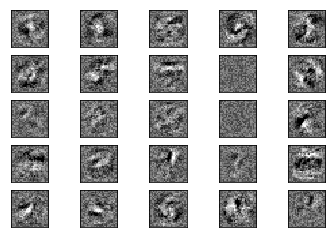

In [26]:
#Weights visualization - 1st layer
fig, axes = plt.subplots(5, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax =mlp.coefs_ [0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    #print("coef shape and axis index", coef.shape, ax)
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

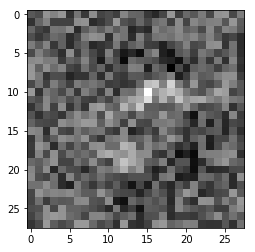

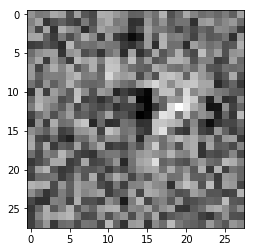

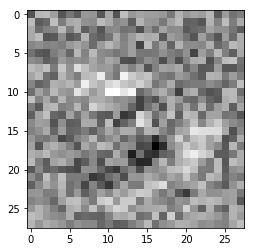

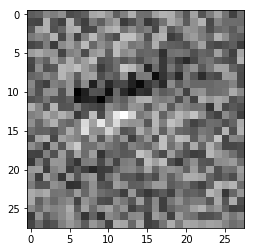

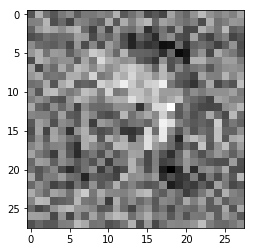

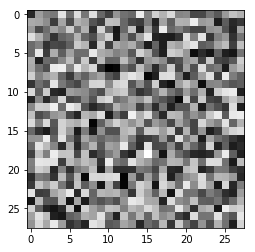

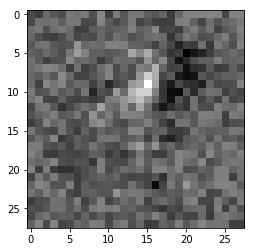

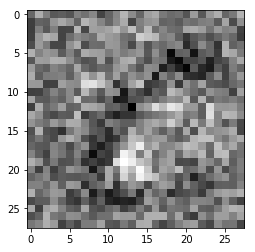

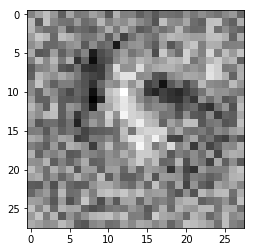

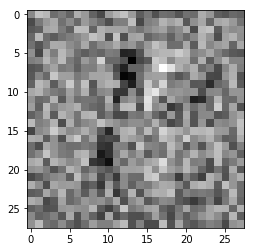

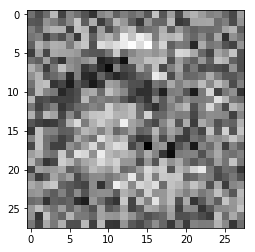

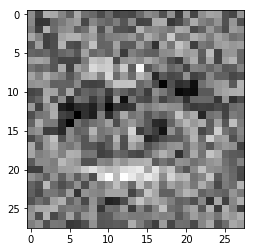

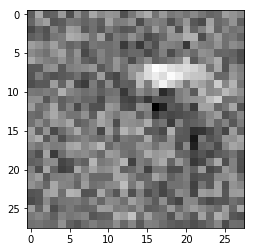

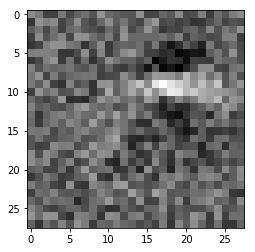

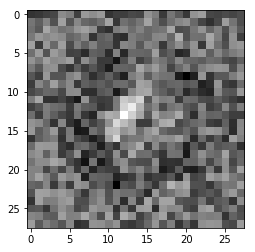

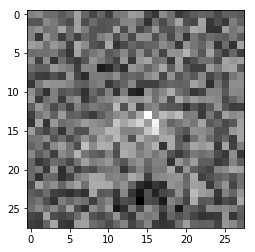

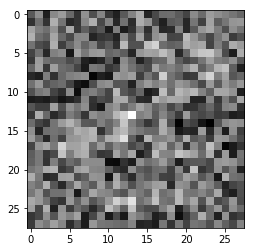

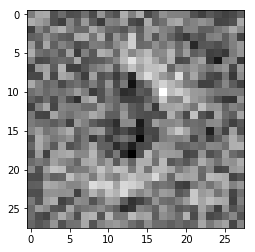

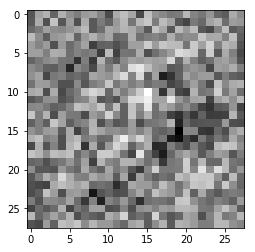

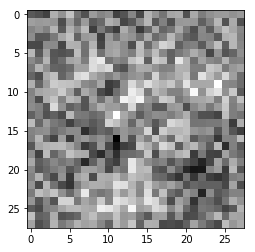

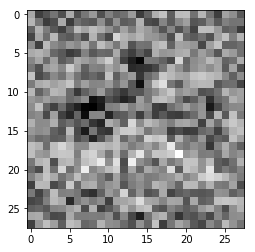

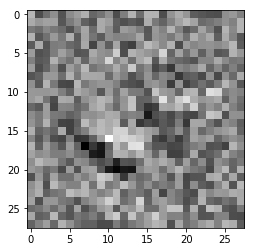

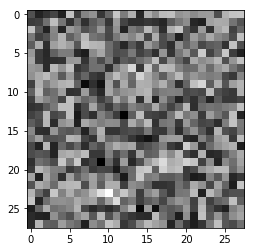

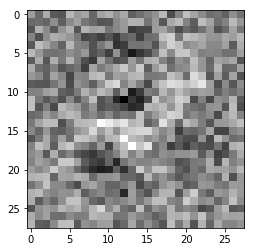

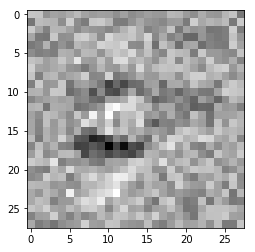

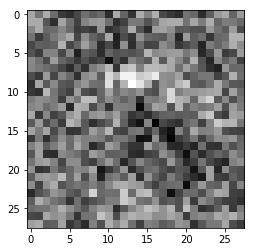

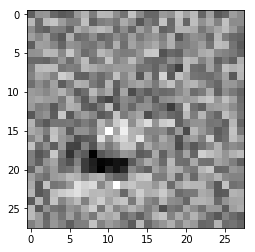

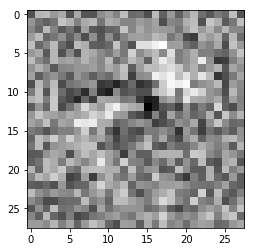

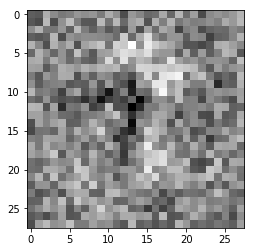

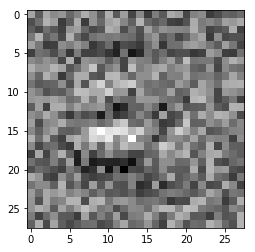

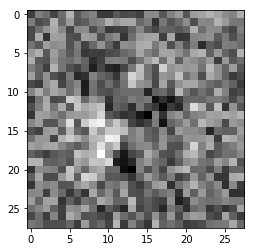

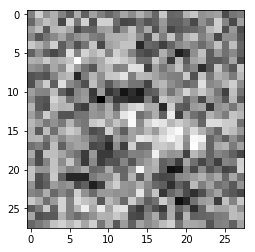

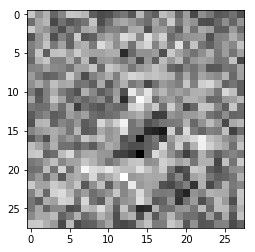

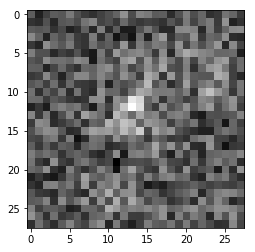

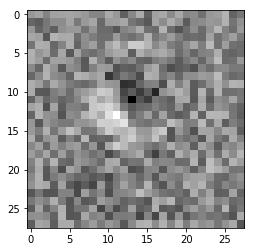

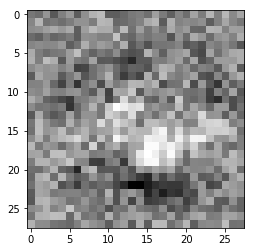

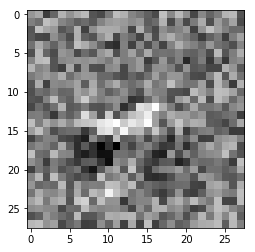

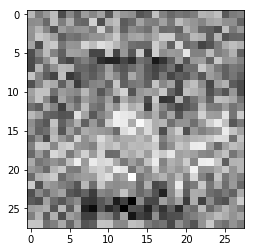

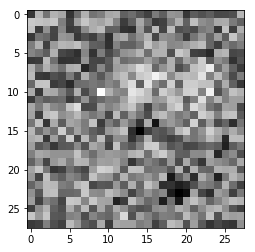

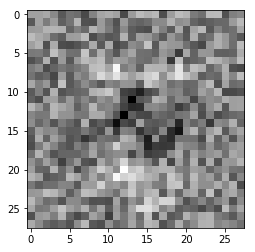

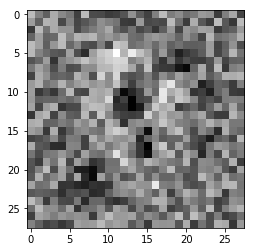

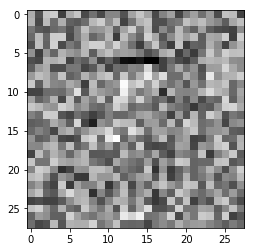

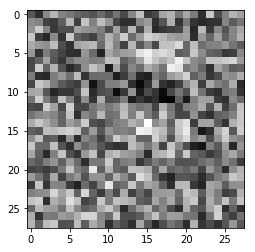

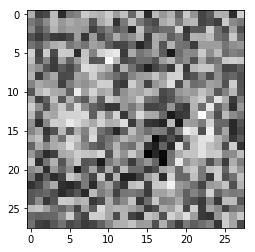

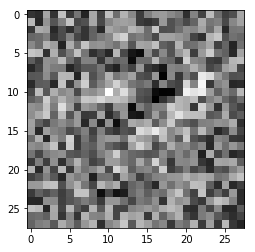

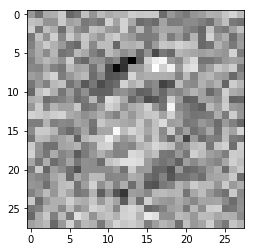

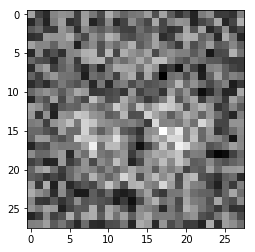

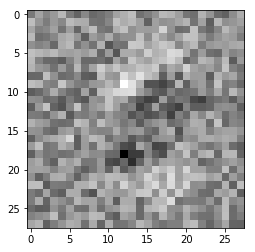

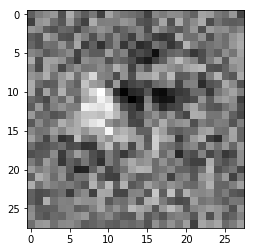

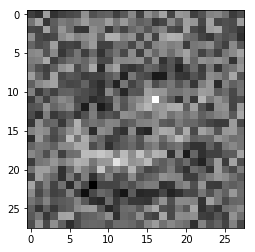

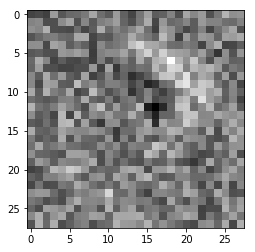

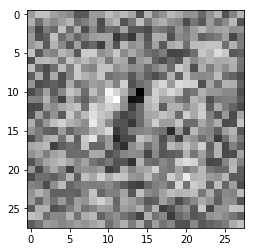

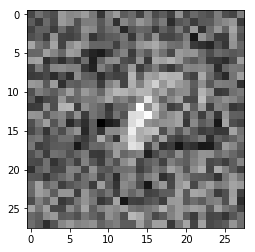

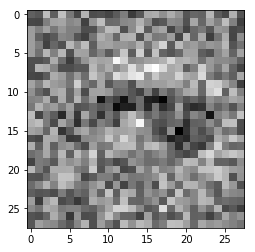

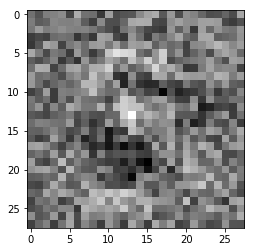

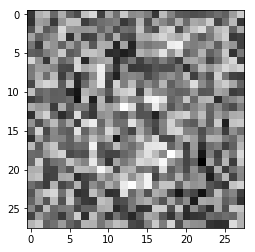

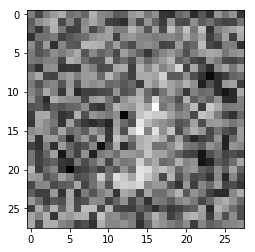

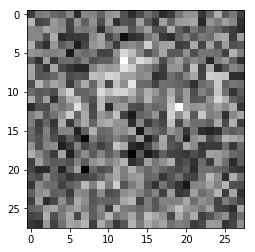

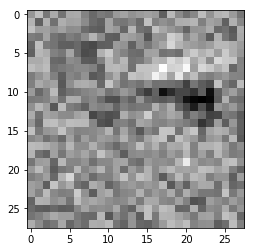

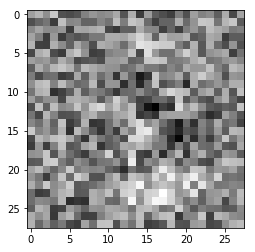

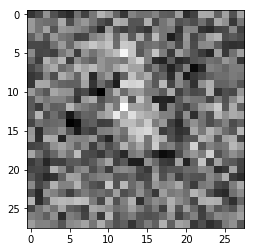

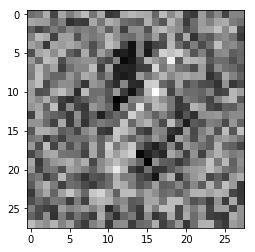

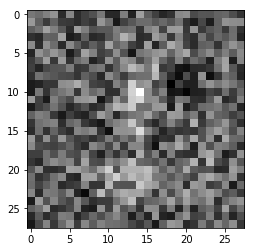

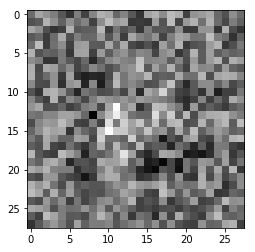

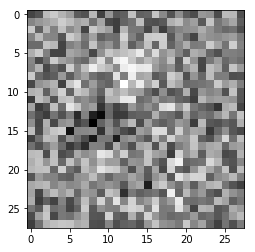

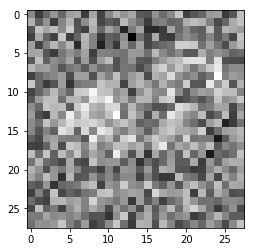

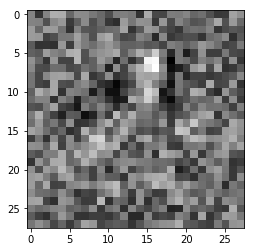

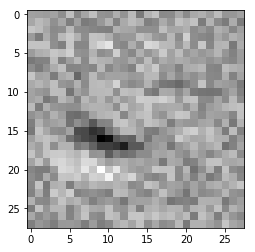

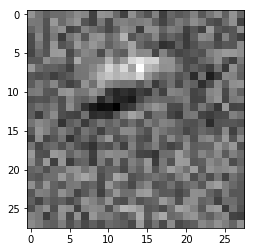

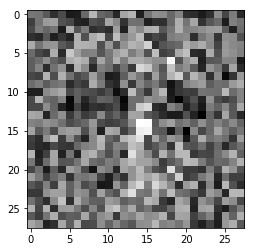

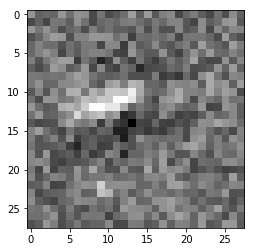

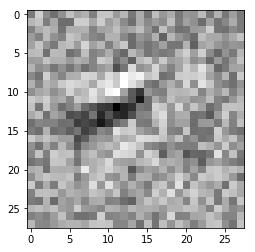

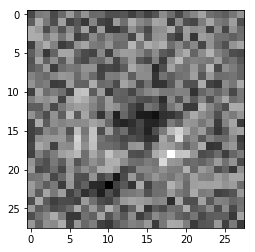

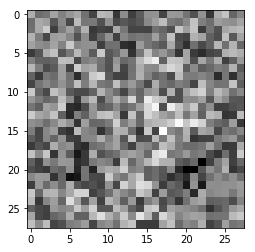

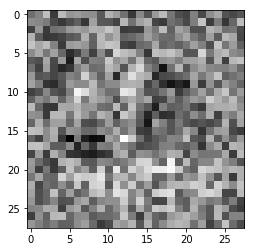

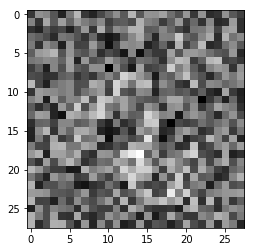

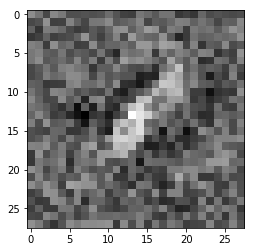

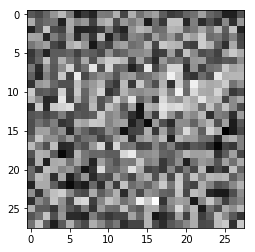

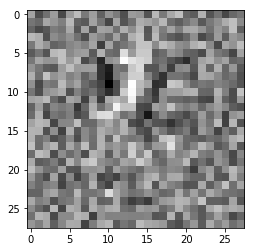

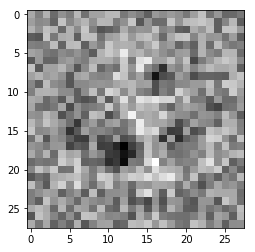

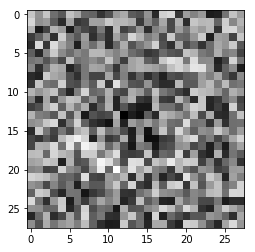

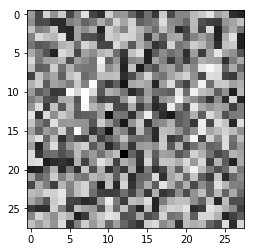

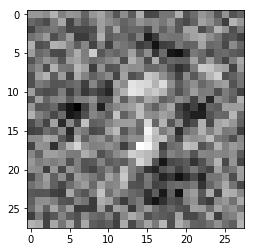

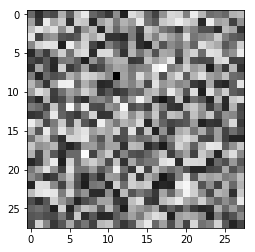

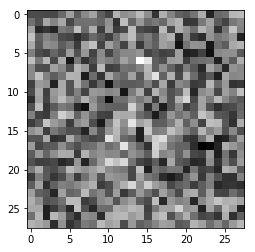

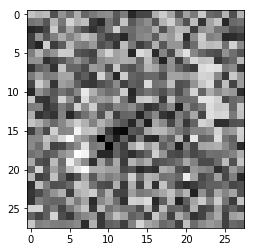

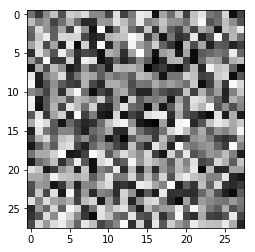

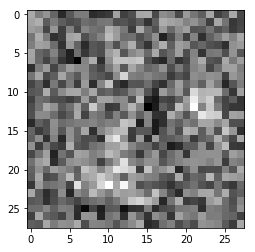

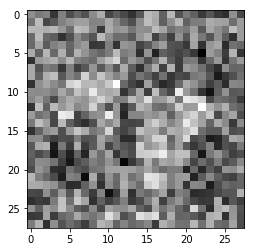

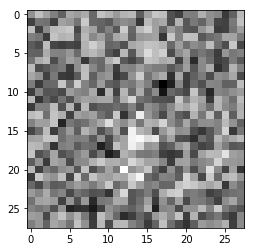

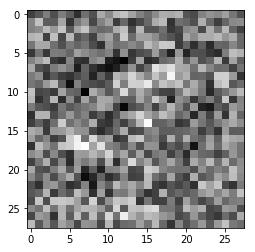

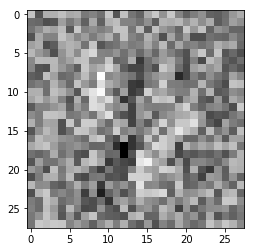

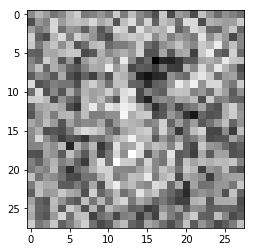

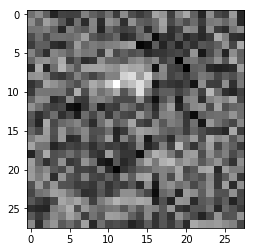

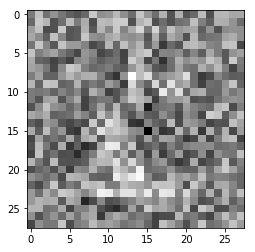

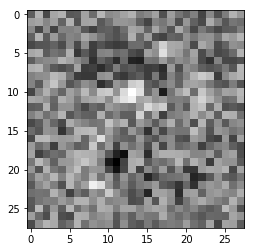

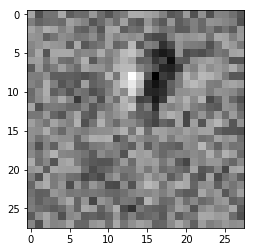

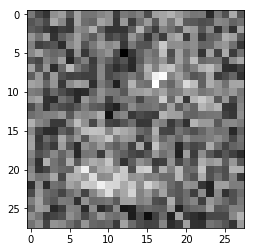

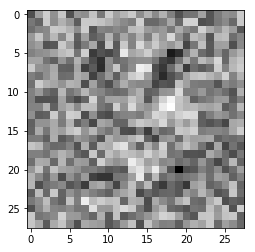

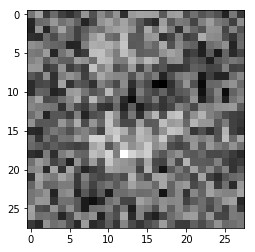

In [108]:
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    plt.imshow(coef.reshape(28,28), cmap=plt.cm.gray)
    plt.show()

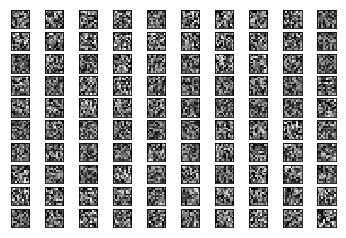

In [93]:
#Weights visualization - 2nd layer
fig, axes = plt.subplots(10, 10)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax =mlp.coefs_ [1].min(), mlp.coefs_[1].max()
for coef, ax in zip(mlp.coefs_[1].T, axes.ravel()):
    ax.matshow(coef.reshape(10, 10), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()